In [52]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.interpolate import UnivariateSpline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
h = 6.62607157e-34
k = 1.3806488e-23
c = 2.99792458e+08
TCMB = 2.72548
f_start = 0.1
f_stop = 1000.0     #Start and end frequencies for analysis


/tmp/ipykernel_78159/672412084.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(r'total_spec_new.txt',sep= "    " ,header = None)


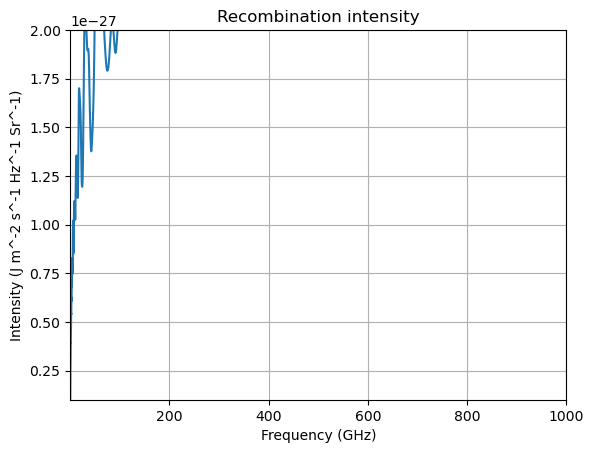

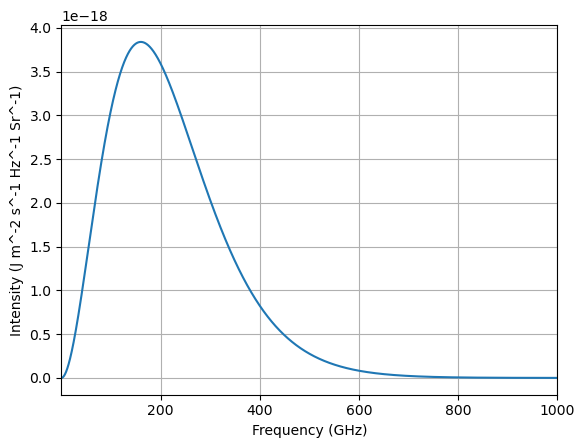

In [11]:
df = pd.read_csv(r'total_spec_new.txt',sep= "    " ,header = None)
df.reset_index(drop=True, inplace=True)
df.columns = ["Frequency","Intensity"]

x = df["Frequency"]
y= df["Intensity"]

plt.plot((df['Frequency']), (df['Intensity']))
plt.title('Recombination intensity')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)')
plt.xlim([f_start,f_stop])
plt.ylim([0.1e-27,2e-27])
plt.grid()
plt.show()

ius = UnivariateSpline(x, y)


def spectral_radiance(freq):     #Freq in GHz
    return (2 * h * freq**3 * 1e+27 / c**2) / (np.exp((h * freq* 1e+9) / (k * TCMB)) - 1)

freq1 = np.arange(f_start, f_stop, 0.01)
BB_Spec = [spectral_radiance(freq1[i]) for i in range(0, len(freq1))]
Rec_int = ius(freq1)
%matplotlib inline
plt.plot(freq1, BB_Spec)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)')
plt.xlim([f_start,f_stop])
plt.grid()
plt.show()
plt.show()



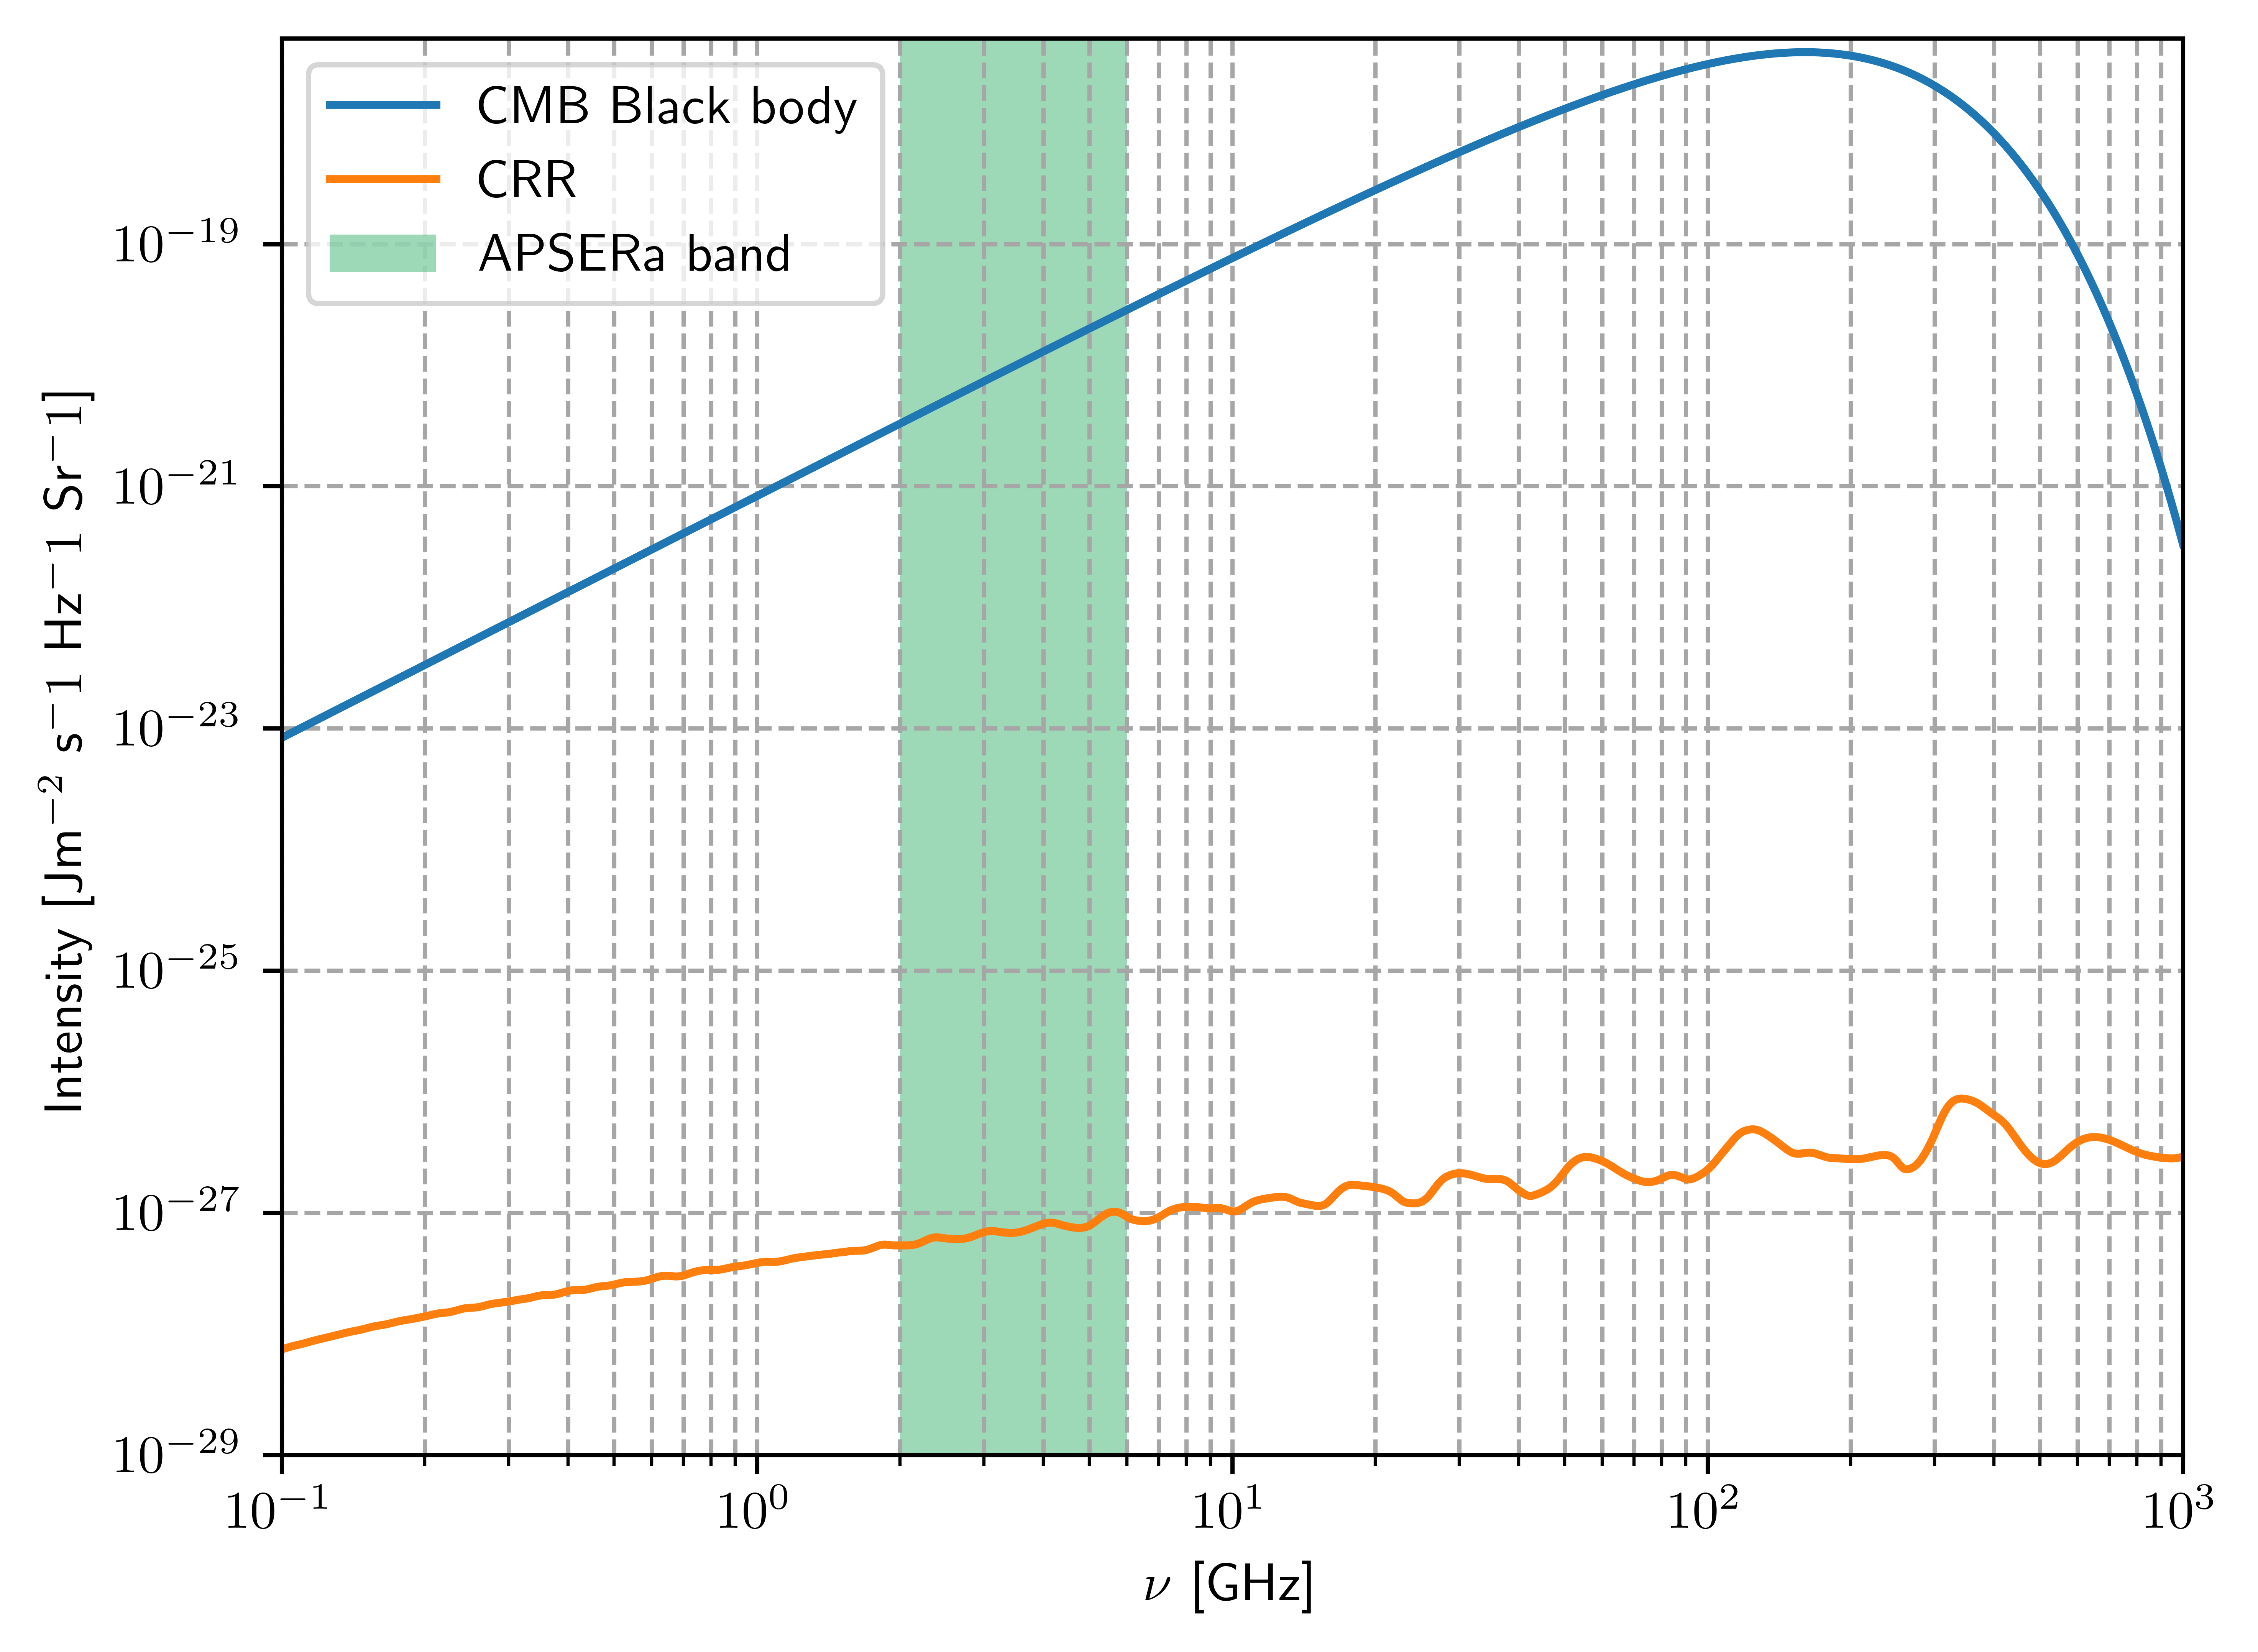

In [59]:
plt.figure(dpi=1000)
plt.rcParams['text.usetex'] = True
plt.grid(True,which="both",ls="--",color='0.65')
# Enabling minor grid lines:
plt.plot(freq1, BB_Spec, label = "CMB Black body")
plt.plot((df['Frequency']), (df['Intensity']), label = "CRR")
#plt.title('Recombination vs CMB')
#plt.xlabel('Frequency (GHz)')
#plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)')
plt.loglog()
#plt.grid()
plt.xlim([f_start,f_stop])
plt.ylim([1e-29,5e-18])
ymin, ymax = plt.ylim()
plt.axvspan(2, 6, facecolor='mediumseagreen', alpha=0.5,label='APSERa band')
#plt.fill_betweenx(BB_Spec, 2,6, where = (BB_Spec>0),color='',alpha=0.5)
plt.legend()
plt.ylabel(r'Intensity [Jm$^{-2}$ s${^-1}$ Hz${^-1}$ Sr${^-1}$]')
plt.xlabel(r'$\nu$ [GHz]')
#plt.minorticks_on()
plt.savefig('CMBvsCRR_fullfreq.pdf')
plt.show()

In [4]:
# Just to check the CMB equation:
f_start = 1
f_stop = 500

freq1 = np.arange(f_start, f_stop, 0.01)
BB_Spec = [spectral_radiance(freq1[i]) for i in range(0, len(freq1))]

max_y_index = np.argmax(BB_Spec)
freq_max = freq1[max_y_index]

print(f"Maximum intensity at frequency: {round(freq_max, 3)} GHz")

%matplotlib inline
plt.plot(freq1, BB_Spec)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)')
plt.xlim([f_start,f_stop])
plt.vlines(freq_max, ymin = 0, ymax = BB_Spec[max_y_index], color = 'black', linestyle = ":")
plt.grid()
plt.show()
plt.show()

NameError: name 'spectral_radiance' is not defined